Stochastic Gradient Descent (**SGD**) -- это метод, который подходит как для online обучения, или обучения в режиме реального времени, когда данные поступают постепенно, так и для Big Data. Причина универсальности этого метода состоит в том, что **SGD** не нужен полный объем данных для решения задач классификации или регрессионного анализа: апдейт модели происходит постепенно, по мере того, как появлятся новые данные.  

Понять логику, каким образом это происходит можно на примере расчета средней величины потока данных:  

1. у нас есть текущее значение среднего μ
2. если следующая величина X, которую мы получаем, больше чем μ, мы увеличиваем μ на τ\*(X-μ), где τ -- это так называемый learning rate
3. если следующая величина Х меньше чем μ, то мы уменьшаем нашу оценку μ 

В случае с **SGD** для решения задач классификации и линейной регрессии, данный алгоритм применяется для поиска глобального минимума `loss function` для соответствующего вида анализа:  

- `log-loss` для классификации методом логистической регрессии (logistic regression)
- `RSS` для линейной регрессии.  

Ниже приведен пример реализации **SGD** для линейной регрессии.

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

Определим функцию для генерации данных:  

- `num = 100`: 100 точек
- `x`: матрица, в которой первый столбец состоит из "1"
- `var = 10` : постоянный "шум" (ошибки в измерении `y` или неконтролируемые факторы)

In [2]:
def gen_data(a,b, num = 100, var = 10):
    x = np.array([[1,i] for i in range(num)])
    y = np.dot(x, [a,b]) + np.array([random.normalvariate(0, var) for _ in range(num)])
    return x,y

Добавим в класс `plt` дополнительный метод `plt.abline(a,b)`, который будет строить прямую линию `y = a + b*x`

In [3]:
def plot_abline(a,b, xmin = -10, xmax = 110, label = 'Least Squares Line'):
    x1 = np.arange(xmin, xmax,1)
    y1 = a + b*x1
    plt.plot(x1,y1, '--r', linewidth = 3, label = label)
    plt.legend(loc = 'upper left')
    
setattr(plt,'abline', plot_abline)

Сгенерируем данные и отобразим их на графике:

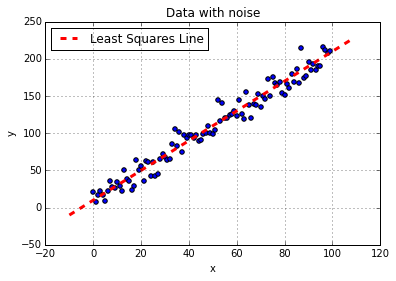

In [4]:
a = 10
b = 2
x, y = gen_data(a,b)

plt.scatter(x[:,1],y)
plt.abline(a,b)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with noise')
plt.grid();

Определим функцию, которая рассчитает оптимальные параметры вектора **β** методом Stochastic Gradient Descent. Для каждой полной итерации по всем строкам **X** (epoch), рассчитаем:  

1. `error`: ошибку при данном значении **β**
2. `gradient`: градиент `loss-function` для линейной регрессии
3. `beta` : апдейт коэффициентов с целью минимизировать `loss-function`

In [8]:
def SGD(x, y, beta, learnig_rate, num_iter):
    N = len(y)
    for i in range(num_iter):
        error = y - np.dot(x, beta)
        cost = np.dot(error.transpose(), error) / N
        if i % 10000 == 0:
            print('Iteration {} | Cost is {}'.format(i, cost))
        gradient = - 2 * np.dot(x.transpose(), error)
        beta -= learning_rate * gradient
    return beta

Рассчитаем коэффициенты при помощи функции `SGD()`:

In [9]:
learning_rate = 1e-6
num_iter = 50000
beta = np.ones(2)

beta_hat = SGD(x,y,beta, learning_rate, num_iter)

beta_hat

Iteration 0 | Cost is 4270.379223162804
Iteration 10000 | Cost is 126.73477204378867
Iteration 20000 | Cost is 121.4437403136901
Iteration 30000 | Cost is 119.52600916495318
Iteration 40000 | Cost is 118.83092870684237


array([ 9.76447381,  1.98925127])

Графически, линия, полученная при помощи Stochastic Gradient Descent, идеально вписывается в сгенерированные данные.

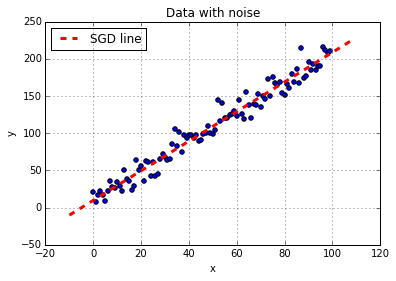

In [7]:
plt.scatter(x[:,1],y)
plt.abline(beta_hat[0], beta_hat[1], label = 'SGD line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with noise')
plt.grid();